In [7]:
import pandas as pd
import numpy as np

## Proportion

In [15]:
visitor_data_before = np.random.binomial(1, 0.5, 1000)
visitor_data_after = np.random.binomial(1,0.7,1000)

In [16]:
visitor_data_before = np.where(visitor_data_before == 1, 'buying', 'no buying')
visitor_data_after = np.where(visitor_data_after == 1, 'buying', 'no buying')

In [19]:
type(visitor_data_after)

numpy.ndarray

In [20]:
df_before = pd.DataFrame({'layout' : 'old layout', 'conversion' : visitor_data_before})
df_after = pd.DataFrame({'layout' : 'new layout', 'conversion' : visitor_data_after})

In [22]:
df_after.head()

,layout,conversion
0,new layout,no buying
1,new layout,buying
2,new layout,buying
3,new layout,buying
4,new layout,no buying


In [23]:
df_full = df_before.append(df_after)

In [25]:
df_full.sample(10)

,layout,conversion
386,new layout,buying
896,old layout,no buying
945,old layout,no buying
58,new layout,buying
140,old layout,no buying
59,old layout,no buying
656,old layout,no buying
727,old layout,no buying
127,old layout,buying
317,old layout,no buying


In [26]:
pd.crosstab(df_full['layout'], df_full['conversion'])

conversion,buying,no buying
layout,,
new layout,694,306
old layout,507,493


In [27]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0)

conversion,buying,no buying
layout,,
new layout,0.694,0.306
old layout,0.507,0.493


<AxesSubplot:xlabel='layout'>

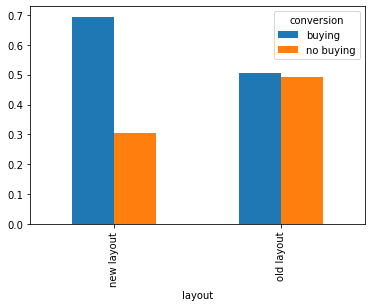

In [28]:
pd.crosstab(df_full['layout'], df_full['conversion'], normalize = 0).plot(kind = 'bar')

# T-test (Hypotesis Testing)

In [38]:
from scipy.stats import ttest_ind
import seaborn as sns
import matplotlib.pyplot as plt

In [32]:
!pip install scipy

In [29]:
hat = pd.concat([pd.Series(data = ['Yes', 'No', 'Yes', 'Yes', 'No', 'No', 'No','Yes','Yes', 'No','Yes','Yes','No','Yes','No','Yes','No','No','No','Yes'],name = 'Wearing Hat'),
                pd.Series(data = [70,85,80,45,80,70,90,70,55,80,75,60,70,85,80,85,55,75,65,70], name ='Score')],axis = 1)

In [33]:
hat.head()

,Wearing Hat,Score
0,Yes,70
1,No,85
2,Yes,80
3,Yes,45
4,No,80


/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Frequency')

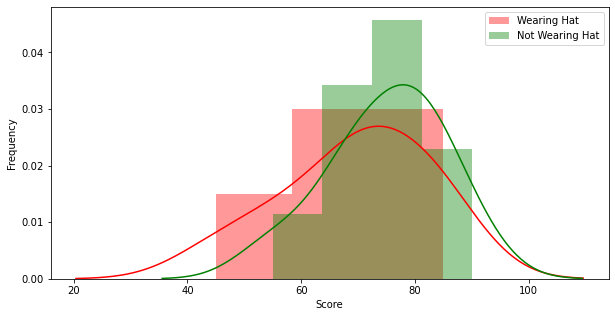

In [46]:
plt.figure(figsize=(10,5))
sns.distplot(hat.loc[hat['Wearing Hat'] == 'Yes']['Score'], color='red', label='Wearing Hat')
sns.distplot(hat.loc[hat['Wearing Hat'] == 'No']['Score'], color='green', label='Not Wearing Hat')
plt.legend()
plt.ylabel('Frequency')

<AxesSubplot:xlabel='Wearing Hat', ylabel='Score'>

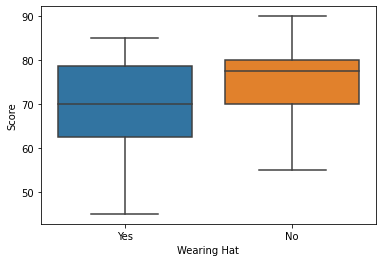

In [47]:
sns.boxplot(x= 'Wearing Hat', y= 'Score', data=hat)

In [60]:
result = ttest_ind(
                hat.loc[hat['Wearing Hat'] == 'No']['Score'],
                hat.loc[hat['Wearing Hat'] == 'Yes']['Score'],)

In [54]:
result

Ttest_indResult(statistic=1.049338951235674, pvalue=0.30790774567150303)

In [59]:
result[1]

0.30790774567150303

In [56]:
p_value = 0.05

In [57]:
if result[1] <= p_value:
    print('Reject H0')
else:
    print('Not Reject H0')

Not Reject H0
